<a href="https://colab.research.google.com/github/Fernando-LunaP/ICDyM/blob/main/proyecto_final/Proyecto_final_ICDyM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<p><img src="https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png" width="150">
</p>



<h1>Introducción a la Ciencia de Datos y sus Metodolgías</h1>

<h3>Proyecto Final: Base de datos, procesamiento y análisis </h3>

<p> Alumno </p>
<p> Fernando Luna Ponce </p>

<p> Profesor </p>
<p> Dr. Juan Pablo Soto Barrera </p>

</center>

En este proyecto vamos a analizar la cantidad de muertes por diabetes en el Estado de Sonora, para lo cual nos conectaremos con una instancia de MYSQL localizada en la nube de Amazon.

# Librerías y funciones

Agregamos las librerías necesarias:

In [ ]:
!pip install pymysql
#!pip install mysql-connector-python # Conector mysql para python
!pip install mysqlclient
!pip install rarfile

In [ ]:
#from mysql.connector import connect, Error # Para realizar conexiones con mysql
import pymysql # Librería para conectar python con mysql
import pandas as pd
from sqlalchemy import create_engine # Librería para interactuar con bases de datos relacionales

import os  # Para manejo de archivos y directorios
import urllib.request # Una forma estandard de descargar datos
# import requests # Otra forma no de las librerías de uso comun

import datetime # Fecha de descarga
import zipfile # Descompresión de archivos
import csv # Para abrir csv
import rarfile # Descompresión de archivos

from bs4 import BeautifulSoup
import requests

import numpy as np

import shutil # Para remover directorios

Definimos algunas funciones que nos ayudarán a simplificar nuestro código

In [ ]:
def descargadatos(url, archivo, subdir): #Para descargar un archivo
  if not os.path.exists(archivo):
    if not os.path.exists(subdir):
        os.makedirs(subdir)
    # Empezamos a descargar el primer archivo
    urllib.request.urlretrieve(url, subdir + archivo)

def descomprimeZip(subdir, archivo): # Descomprime el csv y le cambia el nombre
    with zipfile.ZipFile(subdir + archivo, "r") as zip_ref:
        zip_ref.extractall(subdir)

def descomprimeRAR(subdir, archivo): # Descomprime el csv
    with rarfile.RarFile(subdir + archivo, "r") as zip_ref:
                zip_ref.extractall(subdir)

In [ ]:
def EjecutaSP(Sp, connString): # Ejecuta un procedimiento almacenado sin parámetros
  # create cursor
  connection = pymysql.connect(host=connString[2], port=connString[3],
                         user=connString[0],
                         password=connString[1],
                         db=connString[4])   
  cursor=connection.cursor()

  try:
    # Execute query
    sql = "call " + Sp
    cursor.execute(sql)

    engine.dispose()
    connection.close()
    print('Procedimiento Ejecutado correctamente')
  except:
    engine.dispose()
    connection.close()
    print('Procedimiento No Ejecutado')   

In [ ]:
def EjecutaConsulta(consulta, connString): # Ejecuta un procedimiento almacenado sin parámetros
  # create cursor
  connection = pymysql.connect(host=connString[2], port=connString[3],
                         user=connString[0],
                         password=connString[1],
                         db=connString[4])   
  cursor=connection.cursor()

  validar = consulta[0:6].upper()
  if validar != "SELECT":
    return None

  try:
    # Execute query
    sql = consulta
    cursor.execute(sql)

    # Fetch all the records
    result = cursor.fetchall()
    field_names = [i[0] for i in cursor.description]
    df = pd.DataFrame(result, columns=field_names)
    
    engine.dispose()
    connection.close()

    return df
  except:
    engine.dispose()
    connection.close()
    return None

# Descargando los datos

**Descarga datos fuente defunciones:**

Descargamos los zip y le cambiamos el nombre, luego extraemos las carpetas que contiene y le cambiamos el nombre al csv que nos interesa.

In [ ]:
url_2017 = "https://www.inegi.org.mx/contenidos/programas/mortalidad/datosabiertos/defunciones/2017/conjunto_de_datos_defunciones_generales_2017_csv.zip"
url_2018 = "https://www.inegi.org.mx/contenidos/programas/mortalidad/datosabiertos/defunciones/2018/conjunto_de_datos_defunciones_registradas_2018_csv.zip"
url_2019 = "https://www.inegi.org.mx/contenidos/programas/mortalidad/datosabiertos/defunciones/2019/conjunto_de_datos_defunciones_registradas_2019_csv.zip"
url_2020 = "https://www.inegi.org.mx/contenidos/programas/mortalidad/datosabiertos/defunciones/2020/conjunto_de_datos_defunciones_registradas_2020_csv.zip"
url_2021 = "https://www.inegi.org.mx/contenidos/programas/mortalidad/datosabiertos/defunciones/2021/conjunto_de_datos_defunciones_registradas_2021_csv.zip"

In [ ]:
ruta_archivos = "./data/Archivos/"
if not os.path.exists(ruta_archivos):
    os.makedirs(ruta_archivos)

In [ ]:
archivoZIP = "Defunciones_" + str(2017) + ".zip"
archivoCSV = "Defunciones_" + str(2017) + ".csv"
subdir = "./data/fuente_1/"

descargadatos(url_2017, archivoZIP, subdir)
descomprimeZip(subdir, archivoZIP)
os.rename(subdir + 'conjunto_de_datos/conjunto_de_datos_defunciones_generales_2017.CSV', ruta_archivos + archivoCSV)

In [ ]:
archivoZIP = "Defunciones_" + str(2018) + ".zip"
archivoCSV = "Defunciones_" + str(2018) + ".csv"
subdir = "./data/fuente_2/"

descargadatos(url_2018, archivoZIP, subdir)
descomprimeZip(subdir, archivoZIP)
os.rename(subdir + 'conjunto_de_datos/conjunto_de_datos_defunciones_registradas_2018.csv', ruta_archivos + archivoCSV)

In [ ]:
archivoZIP = "Defunciones_" + str(2019) + ".zip"
archivoCSV = "Defunciones_" + str(2019) + ".csv"
subdir = "./data/fuente_3/"

descargadatos(url_2019, archivoZIP, subdir)
descomprimeZip(subdir, archivoZIP)
os.rename(subdir + 'conjunto_de_datos/conjunto_de_datos_defunciones_registradas_2019.CSV', ruta_archivos + archivoCSV)

In [ ]:
archivoZIP = "Defunciones_" + str(2020) + ".zip"
archivoCSV = "Defunciones_" + str(2020) + ".csv"
subdir = "./data/fuente_4/"

descargadatos(url_2020, archivoZIP, subdir)
descomprimeZip(subdir, archivoZIP)
os.rename(subdir + 'conjunto_de_datos/conjunto_de_datos_defunciones_registrados_2020.csv', ruta_archivos + archivoCSV)

In [ ]:
archivoZIP = "Defunciones_" + str(2021) + ".zip"
archivoCSV = "Defunciones_" + str(2021) + ".csv"
subdir = "./data/fuente_5/"

descargadatos(url_2021, archivoZIP, subdir)
descomprimeZip(subdir, archivoZIP)
os.rename(subdir + 'conjunto_de_datos/conjunto_de_datos_defunciones_registradas_2021.csv', ruta_archivos + archivoCSV)

Guardamos los archivos en dataframes de pandas y verificamos su longitud

In [ ]:
rawDataDefunciones2017 =  pd.read_csv(ruta_archivos + "Defunciones_2017.csv")
print("Tamaño archivo 2017: ", rawDataDefunciones2017.shape)

rawDataDefunciones2018 =  pd.read_csv(ruta_archivos + "Defunciones_2018.csv")
print("Tamaño archivo 2018: ", rawDataDefunciones2018.shape)

rawDataDefunciones2019 =  pd.read_csv(ruta_archivos + "Defunciones_2019.csv")
print("Tamaño archivo 2019: ", rawDataDefunciones2019.shape)

rawDataDefunciones2020 =  pd.read_csv(ruta_archivos + "Defunciones_2020.csv")
print("Tamaño archivo 2020: ", rawDataDefunciones2020.shape)

rawDataDefunciones2021 =  pd.read_csv(ruta_archivos + "Defunciones_2021.csv")
print("Tamaño archivo 2021: ", rawDataDefunciones2021.shape)

Tamaño archivo 2017:  (703047, 59)
Tamaño archivo 2018:  (722611, 62)
Tamaño archivo 2019:  (747784, 59)
Tamaño archivo 2020:  (1086743, 59)
Tamaño archivo 2021:  (1122249, 59)


Debido a que son cientos de miles de registros, antes de guardarlos en la base de datos, primero vamos a filtrarlos para quedarnos solo con los registros correspondientes al Estado de Sonora

In [ ]:
rawDataDefunciones2017 = rawDataDefunciones2017[rawDataDefunciones2017["ent_resid"] == 26]
print(rawDataDefunciones2017.shape)

rawDataDefunciones2018 = rawDataDefunciones2018[rawDataDefunciones2018["ent_resid"] == 26]
print(rawDataDefunciones2018.shape)

rawDataDefunciones2019 = rawDataDefunciones2019[rawDataDefunciones2019["ent_resid"] == 26]
print(rawDataDefunciones2019.shape)

rawDataDefunciones2020 = rawDataDefunciones2020[rawDataDefunciones2020["ent_resid"] == 26]
print(rawDataDefunciones2020.shape)

rawDataDefunciones2021 = rawDataDefunciones2021[rawDataDefunciones2021["ent_resid"] == 26]
print(rawDataDefunciones2021.shape)

(16729, 59)
(17644, 62)
(18485, 59)
(27814, 59)
(25273, 59)


También necesitamos cargar los catálogos algunos catálogos ya que contienen la descripción de los valores de nuestras variables.

In [ ]:
# Causa defunciones
causaDef2017 = pd.read_csv('./data/fuente_1/catalogos/decatcausa.csv', encoding='latin-1')
causaDef2018 = pd.read_csv('./data/fuente_2/catalogos/causa_defuncion.csv', encoding='latin-1')
causaDef2019 = pd.read_csv('./data/fuente_3/catalogos/causa_defuncion.csv', encoding='latin-1')
causaDef2020 = pd.read_csv('./data/fuente_4/catalogos/causa_defuncion.CSV', encoding='latin-1')
causaDef2021 = pd.read_csv('./data/fuente_5/catalogos/causa_defuncion.CSV', encoding='latin-1')

In [ ]:
ruta_archivos = "./data/fuente_5/catalogos/"
tamanio_loc = pd.read_csv(ruta_archivos + 'tamaño_localidad.csv', encoding='latin-1')
ocupacion = pd.read_csv(ruta_archivos + 'ocupacion.csv', encoding='latin-1')
sexo = pd.read_csv(ruta_archivos + 'sexo.csv', encoding='latin-1')
asist_medi = pd.read_csv(ruta_archivos + 'asistencia_medica.csv', encoding='latin-1')
sitio_ocur = pd.read_csv(ruta_archivos + 'sitio_ocurrencia.csv', encoding='latin-1')
lengua = pd.read_csv(ruta_archivos + 'lengua_indigena.csv', encoding='latin-1')

**Descarga datos municipios y habitantes Sonora 2020:**

Nos interesó una tabla que contiene la información del número de habitantes en Sonora, pero no hay un archivo descargable, por lo que tenemos que hacer web scraping para poder descargar esa información.

In [ ]:
url_cuentame = "https://cuentame.inegi.org.mx/monografias/informacion/son/poblacion/default.aspx?tema=me&e=26"
page = requests.get(url_cuentame) # Realizamos la petición a la url solicitada
soup = BeautifulSoup(page.content, 'html.parser') # Le damos formato html a la información

tabla = soup.find('table', id="keywords2")

In [ ]:
# Generamos listas para almacenar toda la información que deseamos almacenar
listaCdMun = list()
listaNbMun = list()
listaCantidad = list()

In [ ]:
filas = tabla.findAll('tr')
for i in range(len(filas)):
  if i > 0:
    columnas = filas[i].findAll('td')
    cd_municipio = columnas[0].string
    listaCdMun.append(cd_municipio)
    nb_municipio = columnas[1].string.replace('    ', ' ')
    listaNbMun.append(nb_municipio)
    nu_habitantes = columnas[2].string.replace(',', '')
    listaCantidad.append(nu_habitantes)

In [ ]:
rawDataHabitantes = pd.DataFrame({"Codigo_Municipio":listaCdMun,
                         "Nombre_Municipio":listaNbMun,
                         "Cantidad_Habitantes":listaCantidad})
rawDataHabitantes.shape

(72, 3)

**Descarga datos Estimación de población Sonora:**

Tenemos la información real de los habitantes de Sonora para el 2020, pero para otros años nos tenemos que basar en las estimaciones de la CONAPO

In [ ]:
url_conapo = "http://www.conapo.gob.mx/work/models/CONAPO/Datos_Abiertos/Proyecciones2018/base_municipios_final_datos_02.rar"


In [ ]:
archivoRAR = "Estimaciones_CONAPO.rar"
archivoCSV = "Estimaciones_CONAPO.csv"
subdir = "./data/conapo/"

descargadatos(url_conapo, archivoRAR, subdir)
descomprimeRAR(subdir, archivoRAR)
os.rename(subdir + 'base_municipios_final_datos_02.csv', ruta_archivos + archivoCSV)


In [ ]:
rawDataEstimaciones =  pd.read_csv(ruta_archivos + "Estimaciones_CONAPO.csv", encoding='latin-1')
print("Tamaño archivo Estimaciones: ", rawDataEstimaciones.shape)

rawDataEstimaciones = rawDataEstimaciones[rawDataEstimaciones["CLAVE_ENT"] == 26]
print(rawDataEstimaciones.shape)

Tamaño archivo Estimaciones:  (653632, 9)
(32256, 9)


# Importando los datos a una base de datos MYSQL

Para interactuar con una base de datos, primero se debe contar con un motor (Engine), el cual se encarga de administrar los llamados que se realizan para el almacenamiento y recuperación de información, y sobre el que se especifican los datos para el uso de la base de datos.

Para realizar nuestra conexión a una instancia de mysql localizada en Amazon Cloud, utilizaremos la librería SQLAlchemy para crear un motor. 

Almacenamos la información necesaria para acceder a la base de datos

In [ ]:
myUser = 'user'
myPass = 'micontraseña'
myEndpoint = 'mydb.123456789012.us-east-1.rds.amazonaws.com' # Endpoint, para base local es localhost
myPort = 3306
myDb = 'Diabetes'

myDataConnect = [myUser, myPass, myEndpoint, myPort, myDb]

In [ ]:
db_data = 'mysql+mysqldb://' + 'user' + ':' + 'micontraseña' + '@' + 'mydb.123456789012.us-east-1.rds.amazonaws.com' + ':3306/' \
       + 'Diabetes'
engine = create_engine(db_data)

Una vez que tenemos creado nuestro motor, vamos a utilizar la función de pandas para insertar los datos de nuestras tabla en nuestra bd, con la función to_sql estaremos guardando cada dataframe en una tabla diferente.

In [ ]:
# Execute the to_sql for writting DF into SQL
rawDataDefunciones2017.to_sql('rawDataDefunciones2017', engine, if_exists='replace', index=False)
rawDataDefunciones2018.to_sql('rawDataDefunciones2018', engine, if_exists='replace', index=False)
rawDataDefunciones2019.to_sql('rawDataDefunciones2019', engine, if_exists='replace', index=False)
rawDataDefunciones2020.to_sql('rawDataDefunciones2020', engine, if_exists='replace', index=False)
rawDataDefunciones2021.to_sql('rawDataDefunciones2021', engine, if_exists='replace', index=False)
rawDataHabitantes.to_sql('rawDataHabitantes', engine, if_exists='replace', index=False)
rawDataEstimaciones.to_sql('rawDataEstimaciones', engine, if_exists='replace', index=False)

In [ ]:
causaDef2017.to_sql('causaDef2017', engine, if_exists='replace', index=False)
causaDef2018.to_sql('causaDef2018', engine, if_exists='replace', index=False)
causaDef2019.to_sql('causaDef2019', engine, if_exists='replace', index=False)
causaDef2020.to_sql('causaDef2020', engine, if_exists='replace', index=False)
causaDef2021.to_sql('causaDef2021', engine, if_exists='replace', index=False)

tamanio_loc.to_sql('tamanio_loc', engine, if_exists='replace', index=False)
ocupacion.to_sql('ocupacion', engine, if_exists='replace', index=False)
sexo.to_sql('sexo', engine, if_exists='replace', index=False)
asist_medi.to_sql('asist_medi', engine, if_exists='replace', index=False)
sitio_ocur.to_sql('sitio_ocur', engine, if_exists='replace', index=False)
lengua.to_sql('lengua', engine, if_exists='replace', index=False)

# Trabajando con MYSQL

En esta parte vamos a mandar ejecutar algunos procedimientos almacenados que se generaron en la base de datos y que nos servirán para realizar el procesamiento de nuestros datos.

In [ ]:
# Actualiza los días fuera de rango
sp = 'Limpia_Datos()'
EjecutaSP(sp, myDataConnect)

Procedimiento Ejecutado correctamente


In [ ]:
# Modifica la clave de la edad para obtener el valor edad, ejemplo 4020 se comvierte a 20
sp = 'Actualiza_Edad()'
EjecutaSP(sp, myDataConnect)

Procedimiento Ejecutado correctamente


In [ ]:
# Almacena los datos de las defunciones por diabetes en una sola tabla
sp = 'Unir_Datos()'
EjecutaSP(sp, myDataConnect)

Procedimiento Ejecutado correctamente


In [ ]:
# Genera el catálogo de municipios y el de cantidad de habitantes por municipio y año
sp = 'Genera_datos_pob()'
EjecutaSP(sp, myDataConnect)

Procedimiento Ejecutado correctamente


# Obteniendo información de la base de datos

Hacemos una consulta que nos traiga toda la información de la vista vw_Reporte que nos va a traer toda la información que nos interesa de las defunciones por diabetes, con las variables ya sustituidas por su descripción

In [ ]:
sql = "Select * from Diabetes.vw_Reporte;"
df_Reporte = EjecutaConsulta(sql, myDataConnect)
df_Reporte.head()

,Id,Anio,Fecha_Registro,Nombre,Tamanio_Localidad,Sexo,Ocupacion,Edad,Asistencia_Medica,Sitio_Ocurrencia,Lengua_Indigena
0,79,2017,2017-01-01,Hermosillo,500 000 a 999 999 habitantes,Mujer,No trabaja,69,Sin asistencia médica,Hogar,No
1,160,2017,2017-01-01,Agua Prieta,75 000 a 99 999 habitantes,Mujer,No trabaja,56,Con asistencia médica,IMSS,No
2,184,2017,2017-01-01,Hermosillo,500 000 a 999 999 habitantes,Hombre,No trabaja,64,Sin asistencia médica,Hogar,No
3,190,2017,2017-01-01,Nogales,100 000 a 249 999 habitantes,Hombre,"Operadores de maquinaria industrial, ensamblad...",73,Con asistencia médica,Hogar,No
4,221,2017,2017-01-01,Hermosillo,500 000 a 999 999 habitantes,Hombre,Trabajadores artesanales,49,Sin asistencia médica,Otro lugar,No


Obtendremos la información de la vista vw_Mortalidad con la información de la mortalidad por diabetes por cada 100,000 habitantes por cada municipio del Estado de Sonora.

In [ ]:
sql = "Select * from Diabetes.vw_Mortalidad where Anio=2020 order by Mortalidad desc;"
df_Mortalidad = EjecutaConsulta(sql, myDataConnect)
df_Mortalidad.head()

,Cd_Municipio,Nombre_Municipio,Anio,Cant_Muertes,Mortalidad
0,9,Bacanora,2020,3,395.26
1,65,Tubutama,2020,5,339.44
2,32,Huásabas,2020,3,337.84
3,7,Atil,2020,2,319.49
4,67,Villa Hidalgo,2020,4,279.92


In [ ]:
df_Mortalidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cd_Municipio      72 non-null     int64 
 1   Nombre_Municipio  72 non-null     object
 2   Anio              72 non-null     int64 
 3   Cant_Muertes      72 non-null     int64 
 4   Mortalidad        72 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.9+ KB


In [ ]:
df_Mortalidad["Mortalidad"] = pd.to_numeric(df_Mortalidad["Mortalidad"])

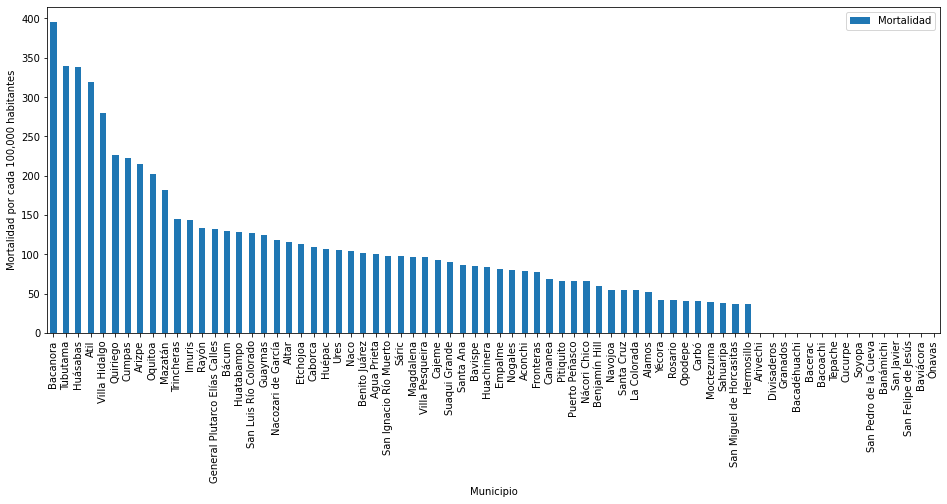

In [ ]:
df_Mortalidad.plot(x="Nombre_Municipio", y="Mortalidad", kind="bar", xlabel='Municipio', ylabel='Mortalidad por cada 100,000 habitantes', figsize=(16,6))